In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [2]:
n_pts = 900
centers = [[-1,1], [-1,-1], [1,-1], [1,1], [0,0]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std = 0.4)
print(X)
print(y)

[[-1.34617291  0.45012481]
 [ 0.70702045 -0.49727167]
 [-0.39054007 -0.21279863]
 ...
 [-0.30238357 -1.38709776]
 [ 1.65163612  2.02235778]
 [-0.1898387   0.77049916]]
[0 2 4 1 1 0 3 4 0 0 4 2 0 2 1 1 4 1 3 0 0 3 4 2 2 0 2 3 3 2 3 3 2 2 3 2 1
 3 4 4 2 4 4 1 1 2 3 0 4 4 1 1 4 0 3 2 3 4 4 4 0 0 1 0 4 2 2 3 4 4 4 0 4 2
 0 0 0 4 0 4 4 4 1 4 0 1 0 1 4 0 3 2 1 2 1 0 0 3 1 4 4 1 0 2 0 4 0 4 3 4 0
 4 4 2 1 4 3 0 0 3 1 3 4 1 0 1 1 4 2 2 4 4 3 0 4 2 4 4 2 0 2 3 0 3 2 3 0 0
 0 4 2 1 2 2 2 2 1 4 3 2 2 2 1 2 0 4 2 4 0 1 2 1 3 0 4 1 3 1 2 2 3 1 0 0 0
 0 0 1 3 1 2 0 2 2 1 4 4 4 1 0 3 2 3 4 3 3 2 0 1 1 2 4 2 4 4 1 1 1 4 3 2 3
 2 0 0 1 3 4 3 2 4 0 1 4 0 0 3 1 2 3 4 3 4 2 3 0 4 4 2 1 2 2 0 2 2 1 0 2 3
 2 1 1 1 3 0 4 1 1 4 3 3 0 4 0 2 4 4 4 4 3 1 1 1 1 0 3 0 4 4 3 4 3 3 2 0 3
 3 3 2 0 3 1 1 3 4 0 3 0 0 0 1 0 4 4 0 2 2 0 2 2 4 3 1 4 0 4 3 2 4 4 2 2 3
 3 0 0 3 0 1 0 0 1 0 1 1 4 3 3 0 4 0 0 4 0 3 2 3 4 2 4 4 0 1 0 2 0 3 0 0 4
 0 0 1 2 0 3 3 0 3 3 1 1 0 1 3 3 2 0 4 1 0 1 0 2 1 4 3 3 0 4 2 3 1 0 2 0 3
 4 1 3 

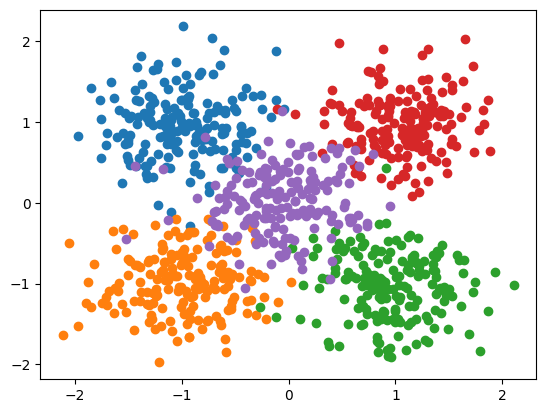

In [3]:
plt.scatter(X[y==0, 0], X[y==0,1])
plt.scatter(X[y==1, 0], X[y==1,1])
plt.scatter(X[y==2, 0], X[y==2,1])
plt.scatter(X[y==3, 0], X[y==3,1])
plt.scatter(X[y==4, 0], X[y==4,1])

In [4]:
print(y)
y_cat = to_categorical(y, max(y)+1)
print(y_cat)

[0 2 4 1 1 0 3 4 0 0 4 2 0 2 1 1 4 1 3 0 0 3 4 2 2 0 2 3 3 2 3 3 2 2 3 2 1
 3 4 4 2 4 4 1 1 2 3 0 4 4 1 1 4 0 3 2 3 4 4 4 0 0 1 0 4 2 2 3 4 4 4 0 4 2
 0 0 0 4 0 4 4 4 1 4 0 1 0 1 4 0 3 2 1 2 1 0 0 3 1 4 4 1 0 2 0 4 0 4 3 4 0
 4 4 2 1 4 3 0 0 3 1 3 4 1 0 1 1 4 2 2 4 4 3 0 4 2 4 4 2 0 2 3 0 3 2 3 0 0
 0 4 2 1 2 2 2 2 1 4 3 2 2 2 1 2 0 4 2 4 0 1 2 1 3 0 4 1 3 1 2 2 3 1 0 0 0
 0 0 1 3 1 2 0 2 2 1 4 4 4 1 0 3 2 3 4 3 3 2 0 1 1 2 4 2 4 4 1 1 1 4 3 2 3
 2 0 0 1 3 4 3 2 4 0 1 4 0 0 3 1 2 3 4 3 4 2 3 0 4 4 2 1 2 2 0 2 2 1 0 2 3
 2 1 1 1 3 0 4 1 1 4 3 3 0 4 0 2 4 4 4 4 3 1 1 1 1 0 3 0 4 4 3 4 3 3 2 0 3
 3 3 2 0 3 1 1 3 4 0 3 0 0 0 1 0 4 4 0 2 2 0 2 2 4 3 1 4 0 4 3 2 4 4 2 2 3
 3 0 0 3 0 1 0 0 1 0 1 1 4 3 3 0 4 0 0 4 0 3 2 3 4 2 4 4 0 1 0 2 0 3 0 0 4
 0 0 1 2 0 3 3 0 3 3 1 1 0 1 3 3 2 0 4 1 0 1 0 2 1 4 3 3 0 4 2 3 1 0 2 0 3
 4 1 3 4 3 0 4 0 4 1 4 0 3 3 4 1 3 3 0 1 3 4 3 2 1 3 4 2 2 1 3 2 3 2 2 3 3
 2 1 2 2 0 0 3 2 2 3 2 1 1 4 4 3 3 4 0 3 3 1 2 1 1 1 1 2 4 2 4 2 3 4 3 0 4
 3 1 1 2 0 0 1 3 3 4 3 1 

In [5]:
model = Sequential()
model.add(Dense(units=max(y)+1, input_shape=(2,), activation='softmax'))
model.compile(Adam(0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.fit(x=X, y=y_cat, verbose=1, batch_size=50, epochs=100)

Epoch 1/100
18/18 [==============================] - 1s 4ms/step - loss: 0.6594 - accuracy: 0.7933
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3147 - accuracy: 0.9378
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.2477 - accuracy: 0.9378
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.2192 - accuracy: 0.9378
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.2043 - accuracy: 0.9400
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1954 - accuracy: 0.9367
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1864 - accuracy: 0.9444
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1832 - accuracy: 0.9411
Epoch 9/100
18/18 [==============================] - 0s 1ms/step - loss: 0.1793 - accuracy: 0.9411
Epoch 10/100
18/18 [==============================] - 0s 1ms/step - loss: 0.1758 - accuracy: 0.9400
Epoch 11/

In [7]:
def plot_decision_boundary(X,y, model):
    x_span = np.linspace(min(X[:,0])-0.25, max(X[:,0])+0.25, 50)
    y_span = np.linspace(min(X[:,1])-0.25, max(X[:,1])+0.25, 50) #tworzenie przestrzeni naszego wykresu w OSI X i Y
    xx, yy = np.meshgrid(x_span, y_span) #tworzy macierz o rozmiarze wektora n , macierz nxn gdzie jedna kolumna badz wiersz maja takie same wartosci
    # print(xx,'\n',yy)
    xx_, yy_ = xx.ravel(), yy.ravel() # ravel robi z macierzy wektor jednowymiarowy
    grid = np.c_[xx_, yy_]
    pred_func = np.argmax(model.predict(grid), axis=1)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

1/1 [==============================] - 0s 36ms/step
Prediction is:  [3]


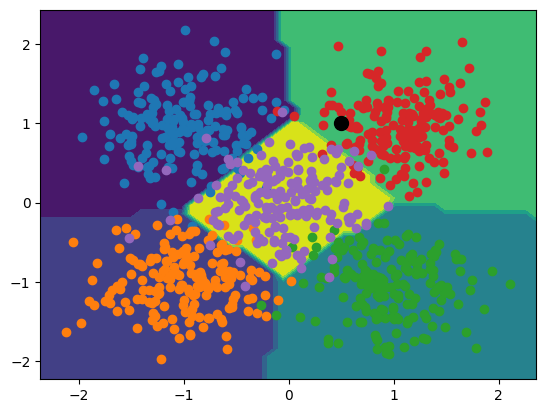

In [8]:
plot_decision_boundary(X,y_cat, model)
plt.scatter(X[y==0, 0], X[y==0,1])
plt.scatter(X[y==1, 0], X[y==1,1])
plt.scatter(X[y==2, 0], X[y==2,1])
plt.scatter(X[y==3, 0], X[y==3,1])
plt.scatter(X[y==4, 0], X[y==4,1])
x= 0.5
y= 1
point = np.array([[x,y]])
predict = np.argmax(model.predict(point), axis=1)
plt.plot([x], [y], marker='o', color="black", markersize=10)
print("Prediction is: ", predict)